## Part 1 - Understanding your data and question

Lok at the question and determine what data you will need to store in your database in order to answer the questions. Start to thin about your DB schema. What tables will you want to create and what columns will you ahve for those tables. 

Look at the API documentation, and determine what fields of the API response you will match up with the columns you want in your DB tables. 


https://www.yelp.com/developers/documentation/v3/get_started

In [ ]:
#Which are the 5 most reviewed businesses?  
# Look for. ' review_count'#Lapis Spa, Tao Spa Miami, VITA Body Club,  Exhale Miami, Mindykim Skincare, Elements Massage-Pinecrest 
#What is the highest rating recieved in your data set and how many businesses have that rating?
#''rating''
#What percentage of businesses have a rating greater than or 4.5?
#What percentage of businesses have a rating less than 3?

#What is the average rating of businesses that have a price label of one dollar sign? Two dollar signs? Three dollar signs?
#'price' , 0:4 $ 
#Return the text of the reviews for the most reviewed business.
#Return the name of the business with the most recent review.
#Find the highest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the most reviews.
#Find the lowest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the least reviews

In [ ]:
import requests
import json

In [ ]:
url =  'https://api.yelp.com/v3/businesses/search' 

In [ ]:
client_id = 'HX7Zg3hgCbFKs_FeotRdCA' 
api_key = 'm3thcmik5l2yJb4BAfg-uYJyI82T6W52bEBS_HFE4nzUudzabtUagvEnJUdwb9wfSDjTZD1C2-qdcpLU6x-suSaz8ijI2b4hc3Brygw8hmNGm_skfaMen_JZ6EvzX3Yx'

In [ ]:
headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

In [ ]:
# what type of business do you want to search
term = 'spa' 

#where do you want to perform this search
location = 'Miami,FL'

# what is your other parameter you want to search against
radius = 40000

In [ ]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50 
                
            }

In [19]:
url_params

{'term': 'spa',
 'location': 'Miami,FL',
 'radius': 40000,
 'limit': 50,
 'offset': 0}

In [20]:
response = requests.get(url, headers=headers, params=url_params)

In [ ]:
response.text

In [21]:
data = json.loads(response.text)

In [ ]:
for key in data.keys(): 
    print(key)
    print(type(data[key]))

In [ ]:
data['total']

In [ ]:
len(data['businesses'])

In [ ]:
url2 = 'https://api.yelp.com/v3/businesses/HrTHjKD-zbS2GvbDCeS54Q/reviews' 
url2

In [ ]:
url3 = 'https://api.yelp.com/v3/businesses/{}/reviews'.format(business_id) 
url3

In [ ]:
response2 = requests.get(url2, headers=headers)
response2.text

In [ ]:
data2 = json.loads(response2.text) 
data2

In [ ]:
response3 = requests.get(url3, headers=headers, params=url_params)
response3.text

## Part 2 - Set up the DB

Now that you are familiar with the data, create your SQL queries to create the DB and the appropriate tables. 

### Foriegn Keys

For this project you will have two tables that you need to link using a foreign key. Below is some information about how to create a foriegn key.  

https://www.sqlitetutorial.net/sqlite-foreign-key/


### Using DB:
    
For this lab, you can either store the data on one DB or put in on both of the partners DBs. If you decide to put it on one DB, you want to make sure both partners have access to it.  To do this you want to add a user to your DB.  

[how to add a new user](https://howchoo.com/g/mtm3zdq2nzv/how-to-add-a-mysql-user-and-grant-privileges)

In [ ]:
## Connect to local SQLite instance 
import sqlite3 
import pandas as pd
import numpy as np

In [7]:
## Create new DB  

conn = sqlite3.connect('yelpspa.db')
cur = conn.cursor()

conn.commit() 
cur.close() 
conn.close()

In [8]:
conn = sqlite3.connect('yelpspa.db')
cur = conn.cursor()

In [9]:
# Create a table for the Businesses 

cur.execute("""CREATE TABLE business (
                                id TEXT PRIMARY KEY NOT NULL,
                                name TEXT,
                                is_closed NUMERIC,
                                review_count INTEGER,
                                category_1 TEXT,
                                category_2 TEXT,
                                rating INTEGER, 
                                price TEXT,
                                area TEXT,
                                location_city TEXT,
                                location_zipcode INTEGER)          
            """) 

conn.commit()

In [22]:
biz_list = []
count = 0
biz_ID_list = []

for business in data['businesses']:
    for item in ['is_closed', 'review_count', 'categories', 'rating', 'price']:
        if item == 'categories':
            if len(business[item]) == 0:
                business[item] = []
                business[item].append({'alias': '', 'title': np.nan})
                business[item].append({'alias': '', 'title': np.nan})
            elif len(business[item]) == 1:
                print('made it')
                business[item].append({'alias': '', 'title': np.nan})
        if item not in business:
            business[item] = np.nan
        else:
            business[item]
        
    biz_tuple = (business['id'], 
            business['name'] , 
            business['is_closed'], 
            business['review_count'],
            business['categories'][0]['title'], 
            business['categories'][1]['title'],
            business ['rating'], 
            business ['price'],
            location,
            business['location']['city'],
            business['location']['zip_code'])
    count += 1
    biz_ID_list.append(business['id'])
    biz_list.append(biz_tuple)

made it
made it
made it
made it
made it
made it
made it
made it
made it
made it
made it
made it


In [23]:
biz_list

[('nNLKoINrGTcwPYznO0afNA',
  'Tao Spa Miami',
  False,
  215,
  'Massage',
  'Skin Care',
  4.5,
  '$$',
  'Miami,FL',
  'Miami Beach',
  '33139'),
 ('HrTHjKD-zbS2GvbDCeS54Q',
  'Biltmore Spa',
  False,
  101,
  'Day Spas',
  'Hair Salons',
  4.0,
  '$$$',
  'Miami,FL',
  'Coral Gables',
  '33134'),
 ('ImwHmojjWspwyItzRZxd7A',
  'The Spa at Mandarin Oriental',
  False,
  73,
  'Day Spas',
  'Massage',
  4.0,
  '$$$$',
  'Miami,FL',
  'Miami',
  '33131'),
 ('N2Rex8AJS2MG58goE-bXLg',
  'Exhale Miami',
  False,
  125,
  'Day Spas',
  nan,
  4.0,
  '$$$',
  'Miami,FL',
  'Miami',
  '33131'),
 ('WcURjIVEINE-Y24WLpezAA',
  'Lapis Spa',
  False,
  296,
  'Day Spas',
  'Hair Salons',
  4.0,
  '$$$',
  'Miami,FL',
  'Miami Beach',
  '33140'),
 ('_ia42yHh93ZT3nBUHqah2w',
  'ME SPA Pembroke Pines',
  False,
  86,
  'Day Spas',
  'Massage',
  4.5,
  '$$',
  'Miami,FL',
  'Pembroke Pines',
  '33027'),
 ('k-7IhhbFIBPHul8kTt-12Q',
  'Body Sense',
  False,
  103,
  'Day Spas',
  'Acupuncture',
  4.5,

In [24]:
biz_ID_list

['nNLKoINrGTcwPYznO0afNA',
 'HrTHjKD-zbS2GvbDCeS54Q',
 'ImwHmojjWspwyItzRZxd7A',
 'N2Rex8AJS2MG58goE-bXLg',
 'WcURjIVEINE-Y24WLpezAA',
 '_ia42yHh93ZT3nBUHqah2w',
 'k-7IhhbFIBPHul8kTt-12Q',
 'QKwwA55LFR2f-bHsWm2Y8A',
 'qu_bT0BP2-qOHUaiVdet0w',
 'E8_C9Q9AFH1iEermrBP9YA',
 'aw0KgujpRfZgrgHV9tFV3w',
 'd6mR7ngdYtGDuTbWlM7mVA',
 'a7TmwhsaAy-ZYddjBRgNdA',
 'Kb90N2LGQ4mHNXpSH4xHbg',
 'yWcsCImrTFp6_Mg_HZXIcw',
 'OYaNEbmBl0ge1V3FkwE9mg',
 'uoNVqp8KLAYYeLzDeCQEWA',
 'pG_xCYGOOZGJFPk60_q9QQ',
 'm7o5c5icwFxu8YG5dcKIBg',
 'PwA5jq0QuHqwrk84KrVtLQ',
 'fbzlD7as3lEJw3l595KgjQ',
 'zNVDZTaKd9aqYuZRJWRG9w',
 'EK5aaj3c4uEoOPtaXJcKzQ',
 'upk91T-WWBPoBanqltP_Kw',
 'lZWlZzP2k0QI4SGxoCPzxg',
 '8G_U0mBAtJXsEho3RsEGfQ',
 'y1Z6IGebQIaPMcZ5BMmA8g',
 'YjjeADTSKV53B2x6hentLA',
 'd97_MiMMhgqH34CaQxDOLg',
 'ssnK9hk7DDW8lvypRg5UXw',
 '1W8g5R8lk49C26jY5vgGRg',
 'a-OaSMsJZYlzRseD_sDAJA',
 'MlncKnaxHlrO8qw1PXQfvQ',
 'EfhW75HfUrbfv07m8hLqJA',
 'AWeFLix12_yY7xbiel64Yg',
 'mVolayOtz0SdZb9sc9FDFQ',
 'UzTuNxtUguKwII9KcB1omg',
 

In [72]:
# Create a table for the reviews 

cur.execute("""CREATE TABLE reviews (
                                id TEXT PRIMARY KEY,
                                text TEXT,
                                rating NUMERIC,
                                time_created NUMERIC,
                                business_id TEXT  
                               )          
            """) 

conn.commit()

In [ ]:
cur.execute("""SELECT * 
                FROM business;
            """) 

cur.fetchall()


## Part 3 - Create ETL pipeline for the business data from the API

Now that you know what data you need from the API, you want to write code that will execute a api call, parse those results and then insert the results into the DB.  

It is helpful to break this up into three different functions (*api call, parse results, and insert into DB*) and then you can write a function/script that pull the other three functions together. 

Let's first do this for the Business endpoint.

In [1]:
import requests
import json
import sqlite3 
import pandas as pd
import numpy as np

In [2]:
url =  'https://api.yelp.com/v3/businesses/search' 

In [3]:
client_id = 'HX7Zg3hgCbFKs_FeotRdCA' 
api_key = 'm3thcmik5l2yJb4BAfg-uYJyI82T6W52bEBS_HFE4nzUudzabtUagvEnJUdwb9wfSDjTZD1C2-qdcpLU6x-suSaz8ijI2b4hc3Brygw8hmNGm_skfaMen_JZ6EvzX3Yx'

In [4]:
headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

In [5]:
# what type of business do you want to search
term = 'spa' 

#where do you want to perform this search
location = 'Miami,FL'

# what is your other parameter you want to search against
radius = 40000

In [6]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

- Write a function to make a call to the yelp API

In [10]:
def yelp_call(url, url_params, api_key):
    # your code to make the yelp call
    response = requests.get(url, headers=headers, params=url_params)
    data = json.loads(response.text)
    return data

- Write a function to parse the API response so that you can easily insert the data in to the DB

In [25]:
def parse_results(results):
    # your code to parse the result to make them easier to insert into the DB
    parsed_results = []
    biz_ID_list = []

    for business in results['businesses']:
        for item in ['is_closed', 'review_count', 'categories', 'rating', 'price']:
            if item == 'categories':
                if len(business[item]) == 0:
                    business[item] = []
                    business[item].append({'alias': '', 'title': np.nan})
                    business[item].append({'alias': '', 'title': np.nan})
                elif len(business[item]) == 1:
                    business[item].append({'alias': '', 'title': np.nan})
            if item not in business:
                business[item] = np.nan
            else:
                business[item]

        biz_tuple = (business['id'], 
                business['name'] , 
                business['is_closed'], 
                business['review_count'],
                business['categories'][0]['title'], 
                business['categories'][1]['title'],
                business ['rating'], 
                business ['price'],
                location,
                business['location']['city'],
                business['location']['zip_code'])
        biz_ID_list.append(business['id'])
        parsed_results.append(biz_tuple)
    return parsed_results

- Write a function to take your parsed data and insert it into the DB

In [32]:
parsed_results

[('nNLKoINrGTcwPYznO0afNA',
  'Tao Spa Miami',
  False,
  215,
  'Massage',
  'Skin Care',
  4.5,
  '$$',
  'Miami,FL',
  'Miami Beach',
  '33139'),
 ('HrTHjKD-zbS2GvbDCeS54Q',
  'Biltmore Spa',
  False,
  101,
  'Day Spas',
  'Hair Salons',
  4.0,
  '$$$',
  'Miami,FL',
  'Coral Gables',
  '33134'),
 ('ImwHmojjWspwyItzRZxd7A',
  'The Spa at Mandarin Oriental',
  False,
  73,
  'Day Spas',
  'Massage',
  4.0,
  '$$$$',
  'Miami,FL',
  'Miami',
  '33131'),
 ('N2Rex8AJS2MG58goE-bXLg',
  'Exhale Miami',
  False,
  125,
  'Day Spas',
  nan,
  4.0,
  '$$$',
  'Miami,FL',
  'Miami',
  '33131'),
 ('WcURjIVEINE-Y24WLpezAA',
  'Lapis Spa',
  False,
  296,
  'Day Spas',
  'Hair Salons',
  4.0,
  '$$$',
  'Miami,FL',
  'Miami Beach',
  '33140'),
 ('_ia42yHh93ZT3nBUHqah2w',
  'ME SPA Pembroke Pines',
  False,
  86,
  'Day Spas',
  'Massage',
  4.5,
  '$$',
  'Miami,FL',
  'Pembroke Pines',
  '33027'),
 ('k-7IhhbFIBPHul8kTt-12Q',
  'Body Sense',
  False,
  103,
  'Day Spas',
  'Acupuncture',
  4.5,

In [33]:
parsed_results[0]

('nNLKoINrGTcwPYznO0afNA',
 'Tao Spa Miami',
 False,
 215,
 'Massage',
 'Skin Care',
 4.5,
 '$$',
 'Miami,FL',
 'Miami Beach',
 '33139')

In [36]:
def db_insert(cnx, cursor, parsed_results):
    # your code to insert and commit the results
    # I would create the connection and cursor outside of this function and then pass it through
#     for business in parsed_results: <-- we had this line while writing the code. but it was not necessary
#     for db_review_insert function, so it might not be necessary here. Need to 
    add_business = ("""INSERT INTO business 
              (id, name, is_closed, review_count, category_1, category_2, rating, price, area,
                   location_city, location_zipcode) 
              VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""")
    
    cursor.executemany(add_business, parsed_results)
    cnx.commit()

- Write a script that combines the three functions above into a single process.

In [37]:
# create a variable  to keep track of which result you are in. 
current_offset = 0
business_ID_list = []

#set up a while loop to go through and grab the result 
while current_offset < 1000:  # current_offset < num and 
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = current_offset
    #make your API call with the new offset number
    results = yelp_call(url, url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = parse_results(results)
    
    # use your function to insert your parsed results into the db
    db_insert(conn, cur, parsed_results)
    #increment the counter by 50 to move on to the next results
    print(current_offset)
    current_offset += 50

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [38]:
#where do you want to perform this search
location = 'Orlando,FL'

In [41]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

In [42]:
url_params

{'term': 'spa', 'location': 'Orlando,FL', 'radius': 40000, 'limit': 50}

In [43]:
# create a variable  to keep track of which result you are in. 
current_offset = 0
business_ID_list = []

#set up a while loop to go through and grab the result 
while current_offset < 1000:  # current_offset < num and 
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = current_offset
    #make your API call with the new offset number
    results = yelp_call(url, url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = parse_results(results)
    
    # use your function to insert your parsed results into the db
    db_insert(conn, cur, parsed_results)
    #increment the counter by 50 to move on to the next results
    print(current_offset)
    current_offset += 50

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [84]:
query = ("SELECT id FROM business ")
cur.execute(query)
business_ID_list = cur.fetchall()

In [114]:
pd.read_sql('SELECT id from business', conn)

,id
0,-4CWLN_ZIWC3dfIWbFHisw
1,-51v1nSIQvqbYfILt8BSKw
2,-6WOo-7oDbq9UMgNQmo4BQ
3,-6n1xRKlUK64DjxYtnB44g
4,-7GkIQg_47vOBH9aBc3qhQ
...,...
1995,zqt0ceq-cSx3vXKqTJPh4A
1996,ztHi4eAgln2jkn738f6mnQ
1997,ztdcbZf5ICBC_XH9f28__g
1998,zwLEQ5nET8c1BDIHHOQ5YQ


In [113]:
pd.DataFrame(business_ID_list)

,0
0,-4CWLN_ZIWC3dfIWbFHisw
1,-51v1nSIQvqbYfILt8BSKw
2,-6WOo-7oDbq9UMgNQmo4BQ
3,-6n1xRKlUK64DjxYtnB44g
4,-7GkIQg_47vOBH9aBc3qhQ
...,...
1995,zqt0ceq-cSx3vXKqTJPh4A
1996,ztHi4eAgln2jkn738f6mnQ
1997,ztdcbZf5ICBC_XH9f28__g
1998,zwLEQ5nET8c1BDIHHOQ5YQ


In [106]:
type(business_ID_list[0])

tuple

In [109]:
type(business_ID_list[0][0])

str

In [110]:
for biz in business_ID_list[:5]:
    bizid = biz[0]
    yelp_review_call(bizid)

In [48]:
len(business_ID_list)

2000

In [ ]:
for id in business_ID_list:
    

In [51]:
def yelp_review_call(business_id):
    # your code to make the yelp call
    response = requests.get('https://api.yelp.com/v3/businesses/{}/reviews'.format(business_id), headers=headers)
    review_data = json.loads(response.text)
    return review_data

In [52]:
id = '-4CWLN_ZIWC3dfIWbFHisw'
review_results = yelp_review_call(id)

In [53]:
review_results

{'reviews': [{'id': 'CymB81wlWv0Z-RS3kPaMfA',
   'url': 'https://www.yelp.com/biz/zativa-life-health-and-wellness-coral-gables?adjust_creative=HX7Zg3hgCbFKs_FeotRdCA&hrid=CymB81wlWv0Z-RS3kPaMfA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=HX7Zg3hgCbFKs_FeotRdCA',
   'text': 'I was feeling down and felt I had some type of virus I went to zativa in Coral Gables and received a high dosage of an immune IV infusion and immediately...',
   'rating': 5,
   'time_created': '2020-11-15 09:48:51',
   'user': {'id': 'jHs1HDEl_Q6FWTkvjOPWEQ',
    'profile_url': 'https://www.yelp.com/user_details?userid=jHs1HDEl_Q6FWTkvjOPWEQ',
    'image_url': None,
    'name': 'Al F.'}}],
 'total': 1,
 'possible_languages': ['en']}

In [55]:
for key in review_results.keys(): 
    print(key)
    print(type(review_results[key]))

reviews
<class 'list'>
total
<class 'int'>
possible_languages
<class 'list'>


In [95]:
biz_id = '6aH7DSWciePmAEiLhTizkw'
review_results = yelp_review_call(biz_id)
review_results

{'reviews': [{'id': 'i2K0dYAdg_79jtldvhOBMQ',
   'url': 'https://www.yelp.com/biz/oviedo-nails-spa-winter-springs?adjust_creative=HX7Zg3hgCbFKs_FeotRdCA&hrid=i2K0dYAdg_79jtldvhOBMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=HX7Zg3hgCbFKs_FeotRdCA',
   'text': "I am SO impressed with Oviedo Nails Spa. I haven't had a manicure since pre-COVID and this place was super clean. Chelsea did a phenomenal job on my nails...",
   'rating': 5,
   'time_created': '2020-08-19 16:30:23',
   'user': {'id': 'wP7LYXw301zCMoI92l14GQ',
    'profile_url': 'https://www.yelp.com/user_details?userid=wP7LYXw301zCMoI92l14GQ',
    'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/osBxZlkbEU4acOn12Wyilw/o.jpg',
    'name': 'Casey M.'}},
  {'id': 'CgeQ5TL6eEaK6wiHaTyMgA',
   'url': 'https://www.yelp.com/biz/oviedo-nails-spa-winter-springs?adjust_creative=HX7Zg3hgCbFKs_FeotRdCA&hrid=CgeQ5TL6eEaK6wiHaTyMgA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=HX7Zg3hg

In [92]:
review_results['error']['code']

'BUSINESS_UNAVAILABLE'

In [80]:
response = requests.get('https://api.yelp.com/v3/businesses/{}/reviews'.format('-4CWLN_ZIWC3dfIWbFHisw'), headers=headers)
review_data = json.loads(response.text)
review_data

{'reviews': [{'id': 'CymB81wlWv0Z-RS3kPaMfA',
   'url': 'https://www.yelp.com/biz/zativa-life-health-and-wellness-coral-gables?adjust_creative=HX7Zg3hgCbFKs_FeotRdCA&hrid=CymB81wlWv0Z-RS3kPaMfA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=HX7Zg3hgCbFKs_FeotRdCA',
   'text': 'I was feeling down and felt I had some type of virus I went to zativa in Coral Gables and received a high dosage of an immune IV infusion and immediately...',
   'rating': 5,
   'time_created': '2020-11-15 09:48:51',
   'user': {'id': 'jHs1HDEl_Q6FWTkvjOPWEQ',
    'profile_url': 'https://www.yelp.com/user_details?userid=jHs1HDEl_Q6FWTkvjOPWEQ',
    'image_url': None,
    'name': 'Al F.'}}],
 'total': 1,
 'possible_languages': ['en']}

In [64]:
review_results['reviews'][0]

{'id': '8XPcvo1or6MAw5d2UCV8dQ',
 'url': 'https://www.yelp.com/biz/mademoiselle-pines-miramar?adjust_creative=HX7Zg3hgCbFKs_FeotRdCA&hrid=8XPcvo1or6MAw5d2UCV8dQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=HX7Zg3hgCbFKs_FeotRdCA',
 'text': 'I was referred to Keisy by a friend and she was right! Keisy is amazing all around - cleans hands and feet very well, great selection of colors and great...',
 'rating': 5,
 'time_created': '2020-11-11 11:30:37',
 'user': {'id': 'Hpkt5TvIHQtiB3WFLnp6Ag',
  'profile_url': 'https://www.yelp.com/user_details?userid=Hpkt5TvIHQtiB3WFLnp6Ag',
  'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/nu_-10y_aX6pHh9tUxUB9Q/o.jpg',
  'name': 'Karen I.'}}

In [65]:
for key in review_results.keys(): 
    print(key)
    print(type(review_results[key]))

reviews
<class 'list'>
total
<class 'int'>
possible_languages
<class 'list'>


In [76]:
review_results

{'error': {'code': 'VALIDATION_ERROR',
  'description': '"(\'-4CWLN_ZIWC3dfIWbFHisw\',)" is not a \'business-id-or-alias\'',
  'field': 'business_id',
  'instance': "('-4CWLN_ZIWC3dfIWbFHisw',)"}}

In [96]:
def parse_review_results(review_results, business_id):
    # your code to parse the result to make them easier to insert into the DB
    parsed_results = []
    
    if 'error' in review_results:
        if review_results['error']['code'] == 'BUSINESS_UNAVAILABLE':
            return None
    else:
        for review in review_results['reviews']:
            for item in ['text', 'rating', 'time_created']:
                if item not in review:
                    review[item] = np.nan
                else:
                    review[item]

            review_tuple = (review['id'], 
                    review['text'] , 
                    review['rating'], 
                    review['time_created'],
                    business_id)
            parsed_results.append(review_tuple)
        return parsed_results

In [70]:
parsed_review_results = parse_review_results(review_results, biz_id)

In [71]:
parsed_review_results

[('8XPcvo1or6MAw5d2UCV8dQ',
  'I was referred to Keisy by a friend and she was right! Keisy is amazing all around - cleans hands and feet very well, great selection of colors and great...',
  5,
  '2020-11-11 11:30:37',
  '01_3mQ-TsSp_MPi-861-3g'),
 ('fir-LqjChzjTOqXWbDJGCw',
  "Omg! So this was my first time here, I so do so L O V E it here! They are so family oriented, it's cozy, and fun to be here. \n\nI will be coming back, this...",
  5,
  '2020-02-29 11:32:30',
  '01_3mQ-TsSp_MPi-861-3g'),
 ('0UlZRvpu5Z6VKL2kyoaMgg',
  'Keisy at mademoiselle Pines is fantastic! I have been going to her for years and she is the sweetest! She takes her time with detailing my nails and I am...',
  5,
  '2020-02-29 12:45:28',
  '01_3mQ-TsSp_MPi-861-3g')]

In [74]:
def db_review_insert(cnx, cursor, parsed_results):
    # your code to insert and commit the results
    # I would create the connection and cursor outside of this function and then pass it through
#     for business in parsed_results:
    add_review = ("""INSERT INTO reviews 
              (id, text, rating, time_created, business_id) 
              VALUES (?, ?, ?, ?, ?)""")
    
    cursor.executemany(add_review, parsed_results)
    cnx.commit()

In [104]:
# create a variable  to keep track of which result you are in. 

#set up a while loop to go through and grab the result 
count = 0
for biz_id in business_ID_list: # we ran this in blocks of 200
#     biz_id = str(biz_id)[2:-3]
    biz_id = biz_id[0]
#     print(biz_id)
    #make your API call with the new offset number
    review_results = yelp_review_call(biz_id)
    
    #after you get your results you can now use your function to parse those results
    parsed_review_results = parse_review_results(review_results, biz_id)
    
    # use your function to insert your parsed results into the db
    if parsed_review_results == None:
        pass
#         print(count)
#         continue
    else:
        db_review_insert(conn, cur, parsed_review_results)
    #increment the counter by 50 to move on to the next results
#     print(count)
    count += 1

## Part 4 -  Create ETL pipeline for the restaurant review data from the API

You've done this for the Businesses, now you need to do this for reviews. You will follow the same process, but your functions will be specific to reviews.

- Write a SQL query to pull back all of the business ids. You will need these ids to pull back the reviews for each restaurant

- Write a function that takes a business id and makes a call to the API for reivews


- Write a function to parse out the relevant information from the reviews

- Write a function to insert the parsed data into the reviews table

- Combine the functions above into a single script  

## Part 5 -  Write SQL queries that will answer the questions posed. 

Now that your data is in the DB, you can answer the questions. Write SQL querires that will answer the questions. **Do not use Pandas for this part of the project.**

Which are the 5 most reviewed businesses?
What is the highest rating recieved in your data set and how many businesses have that rating?
What percentage of businesses have a rating greater than or 4.5?
What percentage of businesses have a rating less than 3?
What is the average rating of businesses that have a price label of one dollar sign? Two dollar signs? Three dollar signs?
Return the text of the reviews for the most reviewed business.
Return the name of the business with the most recent review.
Find the highest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the most reviews.
Find the lowest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the least reviews.

In [151]:
# Which are the 5 most reviewed businesses?
most_reviewed_query = ("""SELECT id, review_count
            FROM business
            ORDER BY review_count DESC
            LIMIT 5;""")
cur.execute(most_reviewed_query)
most_reviewed_list = cur.fetchall()
most_reviewed_list

[('gHq4H4JSyKTtdnZFSBiwdQ', 580),
 ('u8DmsVlpXuSXlXc-cUvoPQ', 417),
 ('eBhYZjns_OHOg0iRW2pYHw', 393),
 ('Y6Ywqa4u1GKNEhM6ZzbDpg', 393),
 ('l3DfUvU2jqu-6pw4DFKDOA', 307)]

In [161]:
# What is the highest rating recieved in your data set and how many businesses have that rating?
highest_rated_query = ("""SELECT rating, count(rating)
            FROM business
            GROUP BY rating
            ORDER BY rating DESC
            LIMIT 2;""")
cur.execute(highest_rated_query)
highest_rated_list = cur.fetchall()
highest_rated_list

[(5, 945), (4.5, 388)]

In [158]:
# What percentage of businesses have a rating greater than or 4.5?
rated4point5plus_query = ("""SELECT round(count(rating), 2) *100/ (SELECT count(id) FROM business) 
                                FROM business
                                WHERE rating >= 4.5;""")
cur.execute(rated4point5plus_query)
rated4point5plus_list = cur.fetchall()
rated4point5plus_list

[(66.65,)]

In [159]:
# What percentage of businesses have a rating less than 3?
rated_lessthan3_query = ("""SELECT round(count(rating), 2) *100/ (SELECT count(id) FROM business) 
                                FROM business
                                WHERE rating < 3;""")
cur.execute(rated_lessthan3_query)
rated_lessthan3_list = cur.fetchall()
rated_lessthan3_list

[(2.35,)]

In [165]:
# What is the average rating of businesses that have a price label of one dollar sign?
# Two dollar signs? Three dollar signs?
avg_rating_by_price_query = ("""SELECT price, round(avg(rating), 2)
            FROM business
            GROUP BY price
            ORDER BY price;""")
cur.execute(avg_rating_by_price_query)
avg_rating_by_price_list = cur.fetchall()
avg_rating_by_price_list

[(None, 4.66), ('$', 4.06), ('$$', 4.28), ('$$$', 4.23), ('$$$$', 4.09)]

In [167]:
# Return the text of the reviews for the most reviewed business.
text_most_reviewed_query = ("""SELECT text
            FROM reviews
            WHERE business_id = (SELECT id
                                    FROM business
                                    ORDER BY review_count DESC
                                    LIMIT 1);""")
cur.execute(text_most_reviewed_query)
text_most_reviewed_list = cur.fetchall()
text_most_reviewed_list

[("I've been going here since I moved to Miami. The shop is a almost always well kept. During Covid, they switched to appointment only to limit the number of...",),
 ("My GO-TO nail place in Miami! Clean, professional and all the nail techs do a great job. COVID protocols are to CDC guidelines! Can't say enough good things...",),
 ('Great nail salon. Fast, convenient, and good! And following social distancing protocol during COVID!',)]

In [169]:
# Return the name of the business with the most recent review.
most_reviewed_name_query = ("""SELECT name
            FROM business
            WHERE id = (SELECT business_id
                                    FROM reviews
                                    ORDER BY time_created DESC
                                    LIMIT 1);""")
cur.execute(most_reviewed_name_query)
most_reviewed_name_list = cur.fetchall()
most_reviewed_name_list

[('Windermere Nails & Spa',)]

In [172]:
# Find the highest rated business and return text of the most recent review.
# If multiple business have the same rating, select the business with the most reviews.
most_recent_text_query = ("""SELECT text
            FROM reviews
            WHERE business_id IN (SELECT id
                                    FROM business
                                    ORDER BY rating DESC, review_count DESC
                                    LIMIT 1)
            ORDER BY time_created DESC
            LIMIT 1;""")
cur.execute(most_recent_text_query)
most_recent_text_list = cur.fetchall()
most_recent_text_list

[('Found them off of Yelp with their good reviews so I had to try them out.Booked an appointment online where there is also pricing which is very helpful and...',)]

In [171]:
# Find the lowest rated business and return text of the most recent review.
# If multiple business have the same rating, select the business with the least reviews.
most_recent_lowest_rated_query = ("""SELECT text, time_created, name, b.rating, review_count
            FROM reviews AS r
            LEFT JOIN business AS b
            ON r.business_id = b.id
            ORDER BY b.rating ASC, review_count ASC, time_created DESC
            LIMIT 1;""")
cur.execute(most_recent_lowest_rated_query)
most_recent_lowest_rated_list = cur.fetchall()
most_recent_lowest_rated_list

[("I'm going to try to keep this short \n\nThis is one of those massages that are set up in the middle of the mall.\n\nVery nice people. Very friendly. After my...",
  '2019-11-14 13:22:13',
  'Total Massage Relax',
  1,
  1)]

## Part 6 - Pull in relevant data into your python environment and analysis it using descriptive statistics.  This can be don either using Pandas or solely Python code.


In [182]:
cur.execute("SELECT * from business")
business_data = pd.DataFrame(cur.fetchall())
business_data.columns = [x[0] for x in cur.description]
business_data

,id,name,is_closed,review_count,category_1,category_2,rating,price,area,location_city,location_zipcode
0,nNLKoINrGTcwPYznO0afNA,Tao Spa Miami,0,215,Massage,Skin Care,4.5,$$,"Miami,FL",Miami Beach,33139
1,HrTHjKD-zbS2GvbDCeS54Q,Biltmore Spa,0,101,Day Spas,Hair Salons,4.0,$$$,"Miami,FL",Coral Gables,33134
2,ImwHmojjWspwyItzRZxd7A,The Spa at Mandarin Oriental,0,73,Day Spas,Massage,4.0,$$$$,"Miami,FL",Miami,33131
3,N2Rex8AJS2MG58goE-bXLg,Exhale Miami,0,125,Day Spas,None,4.0,$$$,"Miami,FL",Miami,33131
4,WcURjIVEINE-Y24WLpezAA,Lapis Spa,0,296,Day Spas,Hair Salons,4.0,$$$,"Miami,FL",Miami Beach,33140
...,...,...,...,...,...,...,...,...,...,...,...
1995,nnqKtjBXIlQULEvF1HNccA,Special Hands Massage,0,1,Massage,None,1.0,None,"Orlando,FL",Orlando,32839
1996,9LpTyXZaAXdFVM-EtVz8Jw,South Lake Wellness & Injury Center,0,7,Chiropractors,Acupuncture,5.0,None,"Orlando,FL",Clermont,34711
1997,Kt4QV1Allxvt4wKnl8JYcg,Maxim Nails & Day Spa,0,183,Nail Salons,Day Spas,3.0,$$,"Orlando,FL",Orlando,32828
1998,e_3gf9yaY-tn_Zo_PmqjHw,Kirkman Chiropractic,0,11,Chiropractors,Orthopedists,4.0,None,"Orlando,FL",Orlando,32811


In [184]:
business_data.describe(include = 'all')

,id,name,is_closed,review_count,category_1,category_2,rating,price,area,location_city,location_zipcode
count,2000,2000,2000.0,2000.000000,2000,1501,2000.000000,1071,2000,2000,2000.0
unique,2000,1933,NaN,NaN,74,90,NaN,4,2,109,168.0
top,cf6V1KCvZikO_ctwFBIWZw,Hand & Stone Massage and Facial Spa,NaN,NaN,Hair Salons,Massage Therapy,NaN,$$,"Orlando,FL",Orlando,32789.0
freq,1,18,NaN,NaN,321,177,NaN,812,1000,465,86.0
mean,NaN,NaN,0.0,22.631500,NaN,NaN,4.438000,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,41.849856,NaN,NaN,0.702248,NaN,NaN,NaN,NaN
min,NaN,NaN,0.0,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.0,3.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.0,8.000000,NaN,NaN,4.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.0,24.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [189]:
business_data[business_data['area'] == 'Miami,FL'].describe(include = 'all')

,id,name,is_closed,review_count,category_1,category_2,rating,price,area,location_city,location_zipcode
count,1000,1000,1000.0,1000.000000,1000,781,1000.000000,536,1000,1000,1000.0
unique,1000,977,NaN,NaN,59,65,NaN,4,1,57,95.0
top,rFpGgzqX9XBxhZ6QCYRung,Hand & Stone Massage and Facial Spa,NaN,NaN,Hair Salons,Skin Care,NaN,$$,"Miami,FL",Miami,33134.0
freq,1,7,NaN,NaN,153,98,NaN,398,1000,457,68.0
mean,NaN,NaN,0.0,25.151000,NaN,NaN,4.503000,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,46.911693,NaN,NaN,0.645296,NaN,NaN,NaN,NaN
min,NaN,NaN,0.0,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.0,3.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.0,8.000000,NaN,NaN,4.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.0,27.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [190]:
business_data[business_data['area'] == 'Orlando,FL'].describe(include = 'all')

,id,name,is_closed,review_count,category_1,category_2,rating,price,area,location_city,location_zipcode
count,1000,1000,1000.0,1000.000000,1000,720,1000.000000,535,1000,1000,1000.0
unique,1000,964,NaN,NaN,52,70,NaN,4,1,52,73.0
top,loqFBcuflLlFWPamTiiXHQ,Hand & Stone Massage and Facial Spa,NaN,NaN,Nail Salons,Waxing,NaN,$$,"Orlando,FL",Orlando,32789.0
freq,1,11,NaN,NaN,197,89,NaN,414,1000,465,86.0
mean,NaN,NaN,0.0,20.112000,NaN,NaN,4.373000,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,35.932696,NaN,NaN,0.749622,NaN,NaN,NaN,NaN
min,NaN,NaN,0.0,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.0,3.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.0,7.000000,NaN,NaN,4.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.0,21.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [193]:
business_data['is_closed'].value_counts()

0    2000
Name: is_closed, dtype: int64

In [191]:
business_data['category_1'].value_counts()

Hair Salons                      321
Nail Salons                      272
Massage                          259
Day Spas                         228
Massage Therapy                  204
                                ... 
Obstetricians & Gynecologists      1
Prenatal/Perinatal Care            1
Threading Services                 1
Oxygen Bars                        1
Medical Centers                    1
Name: category_1, Length: 74, dtype: int64

In [192]:
business_data['category_2'].value_counts()

Massage Therapy           177
Skin Care                 174
Massage                   154
Waxing                    139
Nail Salons               129
                         ... 
Cryotherapy                 1
Pilates                     1
Motorcycle Repair           1
Juice Bars & Smoothies      1
Orthotics                   1
Name: category_2, Length: 90, dtype: int64

In [196]:
business_data['name'].value_counts()

Hand & Stone Massage and Facial Spa    18
Oriental Massage                        6
MassageLuXe                             5
XpresSpa                                5
iStudio Salons                          3
                                       ..
Exum Chiropractic Clinic                1
Ceragem                                 1
Lake Nona Ophthalmology                 1
Priv                                    1
Glory Facial & Foot Spa                 1
Name: name, Length: 1933, dtype: int64

In [183]:
cur.execute("SELECT * from reviews")
reviews_data = pd.DataFrame(cur.fetchall())
reviews_data.columns = [x[0] for x in cur.description]
reviews_data

,id,text,rating,time_created,business_id
0,CymB81wlWv0Z-RS3kPaMfA,I was feeling down and felt I had some type of...,5,2020-11-15 09:48:51,-4CWLN_ZIWC3dfIWbFHisw
1,wy3NtldU5z0mPVlELFu_XQ,I honestly don't have anything bad to say abou...,5,2020-11-01 12:00:37,-51v1nSIQvqbYfILt8BSKw
2,pmSDNCahkAjoicOSyF6weg,Update - made an appointment for 330. Checked ...,1,2020-12-30 12:30:20,-51v1nSIQvqbYfILt8BSKw
3,UhXhG7GTUH8S-66cbPSabQ,First time visiting this place and it was amaz...,5,2021-01-01 14:02:15,-51v1nSIQvqbYfILt8BSKw
4,yeKGoi3UKVSV6FY3x_QLjw,My daughter went to a party here and loved it ...,5,2018-03-24 14:09:14,-6WOo-7oDbq9UMgNQmo4BQ
...,...,...,...,...,...
5181,d6xLZUGnvNTegiQJa71jfw,After looking for a location where I can regul...,5,2017-02-10 16:03:11,zwLEQ5nET8c1BDIHHOQ5YQ
5182,ExYUxbvcVi-yw_cKSfR5eQ,"""First off, $24 for a one-hour massage is unbe...",5,2015-09-18 15:55:40,zwLEQ5nET8c1BDIHHOQ5YQ
5183,6ebVJal8wW-PHm7dXJiLWw,My experience with Miami acupuncture and class...,5,2019-04-07 13:01:18,zygj7nRfUhVvMpmaET-TaQ
5184,SPi-gRENbKrkZU3-_VdW4w,Although I was skeptical and an emotional cli...,5,2018-05-17 12:52:19,zygj7nRfUhVvMpmaET-TaQ


## Part 7 - Create Data visualizations using Matplotlib or Seaborn

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
sns.set_style('darkgrid')

In [211]:
business_data['price'].value_counts()

$$      812
$$$     144
$        93
$$$$     22
Name: price, dtype: int64

In [224]:
business_data['price'].unique()

array(['$$', '$$$', '$$$$', None, '$'], dtype=object)

In [261]:
business_data['price'].isna().sum()

929

In [266]:
business_data[business_data['area'] == 'Orlando,FL']['price'].isna().sum()

465

In [267]:
business_data[business_data['area'] == 'Miami,FL']['price'].isna().sum()

464

In [231]:
business_data['price_text'] = business_data['price'].map({'$':'1_dollar','$$':'2_dollar',
                                                         '$$$':'3_dollar', '$$$$':'4_dollar'})

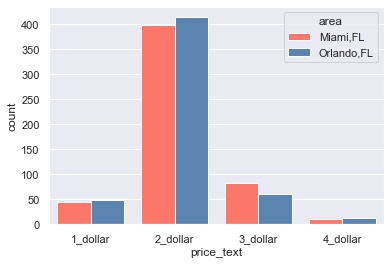

In [251]:
# break out by prices
sns.set_context('notebook')
sns.countplot(x = 'price_text', data = business_data, order = ['1_dollar', '2_dollar', '3_dollar', '4_dollar'],
             hue = 'area', palette = ['#FC766AFF', '#5B84B1FF'], saturation = 1);
# exclude price = None
# Orlando,FL has 465 businesses without price
# Miami,FL has 464 businesses without price

In [273]:
business_data['location_city'].unique()

array(['Miami Beach', 'Coral Gables', 'Miami', 'Pembroke Pines',
       'Key Biscayne', 'Sunny Isles Beach', 'Bal Harbour', 'Doral',
       'Miami Lakes', 'Aventura', 'North Miami', 'Surfside', 'Hollywood',
       'Homestead', 'Hallandale Beach', 'Palmetto Bay', 'South Miami',
       'Miami (Kendall)', 'Davie', 'Miramar', 'Cutler Bay',
       'Coconut Grove', 'Pinecrest', 'Hallandale', 'North Miami Beach',
       'North Bay Village', 'Miami Shores', 'Weston', 'Hialeah',
       'Hialeah Gardens', 'Kendall', 'Dania Beach', 'Fort Lauderdale',
       'Miami Gardens', 'Bay Harbour Islands', 'Coral Gables,',
       'Plantation', 'Sunset', 'CORAL GABLES', 'Bay Harbor Islands',
       'Cooper City', 'Downtown Miami', 'Sunny Isle Beach', 'San Juan',
       'Garage', 'Sunny Isles', 'pembroke pines', 'Coral Grables',
       'miami', 'Miami Springs', 'West Miami', 'Pembroke Park',
       'Coral Springs', 'Miami Garden', 'Bay Harbor', 'Wilton Manors',
       'cutler bay', 'Orlando', 'Winter Park', 

In [282]:
business_data['location_city'].value_counts()

Orlando                465
Miami                  457
Winter Park            106
Miami Beach             86
Coral Gables            73
                      ... 
Bay Harbour Islands      1
Heathrow                 1
Oakland                  1
Orlando, Florida         1
Altamonte Spring         1
Name: location_city, Length: 109, dtype: int64

In [285]:
business_data[business_data['location_city'] =='ORLANDO']

ORLANDO    1
Name: location_city, dtype: int64

In [290]:
business_data[business_data['area'] == 'Miami,FL']['location_city'].value_counts()[:10]

Miami                457
Miami Beach           86
Coral Gables          73
Doral                 44
Pembroke Pines        38
Hollywood             33
South Miami           23
Hialeah               23
Miami Lakes           15
Sunny Isles Beach     15
Name: location_city, dtype: int64

In [293]:
top10_city_Miami = business_data[business_data['area'] == 'Miami,FL']['location_city'].value_counts()[:10]
top10_city_Miami[0]

457

In [297]:
cur.execute("""SELECT location_city, count(location_city)
                    FROM business
                    WHERE area = 'Miami,FL'
                    GROUP BY location_city
                    ORDER BY count(location_city) DESC
                    LIMIT 10;
                        """)

top10_city_Miami = pd.DataFrame(cur.fetchall())
top10_city_Miami.columns = [x[0] for x in cur.description]
top10_city_Miami

,location_city,count(location_city)
0,Miami,457
1,Miami Beach,86
2,Coral Gables,73
3,Doral,44
4,Pembroke Pines,38
5,Hollywood,33
6,South Miami,23
7,Hialeah,23
8,Sunny Isles Beach,15
9,Miramar,15


In [298]:
cur.execute("""SELECT location_city, count(location_city)
                    FROM business
                    WHERE area = 'Orlando,FL'
                    GROUP BY location_city
                    ORDER BY count(location_city) DESC
                    LIMIT 10;
                        """)

top10_city_Orlando = pd.DataFrame(cur.fetchall())
top10_city_Orlando.columns = [x[0] for x in cur.description]
top10_city_Orlando

,location_city,count(location_city)
0,Orlando,465
1,Winter Park,106
2,Altamonte Springs,55
3,Kissimmee,50
4,Lake Mary,39
5,Oviedo,36
6,Longwood,24
7,Ocoee,20
8,Sanford,19
9,Casselberry,19


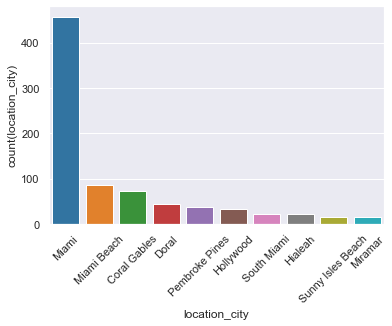

In [314]:
# break out by city
sns.barplot(x = 'location_city', y = 'count(location_city)', data = top10_city_Miami)
plt.xticks(rotation = 45);

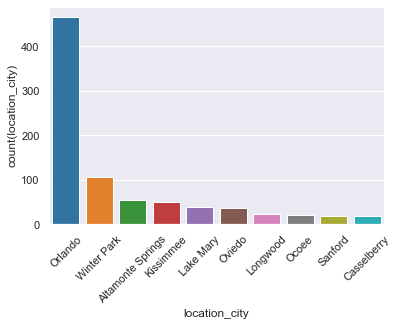

In [315]:
# break out by city
sns.barplot(x = 'location_city', y = 'count(location_city)', data = top10_city_Orlando)
plt.xticks(rotation = 45);

# Reference help

###  Pagination

Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retriving 50 at a time. Processes such as these are often refered to as pagination.

Now that you have an initial response, you can examine the contents of the json container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. 

**Note: be mindful of the API rate limits. You can only make 5000 requests per day, and APIs can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

***Below is sample code that you can use to help you deal with the pagination parameter and bring all of the functions together.***


***Also, something might cause your code to break while it is running. You don't want to constantly repull the same data when this happens, so you should insert the data into the database as you call and parse it, not after you have all of the data***


In [ ]:
# create a variable  to keep track of which result you are in. 
cur = 0

#set up a while loop to go through and grab the result 
while cur < num and cur < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = cur
    #make your API call with the new offset number
    results = yelp_call(url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = parse_results(results)
    
    # use your function to insert your parsed results into the db
    db_insert(parsed_results)
    #increment the counter by 50 to move on to the next results
    cur += 20